# Análise do preço de venda de casas

Iremos ao longo deste notebook realizar uma pequena análise exploratória para entender melhor os dados e depois iremos criar um modelo estatístico para realizar a previsão do preço de vendas. Com o modelo criado faremos alguns testes.

In [1]:
#Leitura do dataset
casas <- read.table("houses.dat", header=T)

#Mostrando algundos dados
head(casas)

case,taxes,beds,baths,new,price,size
1,3104,4,2,0,279.9,2048
2,1173,2,1,0,146.5,912
3,3076,4,2,0,237.7,1654
4,1608,3,2,0,200.0,2068
5,1454,3,3,0,159.9,1477
6,2997,3,2,1,499.9,3153


In [2]:
#Removendo indice
casas = casas[-1]

#Mostrando novamente os dados
head(casas)

taxes,beds,baths,new,price,size
3104,4,2,0,279.9,2048
1173,2,1,0,146.5,912
3076,4,2,0,237.7,1654
1608,3,2,0,200.0,2068
1454,3,3,0,159.9,1477
2997,3,2,1,499.9,3153


## 1 - Análise descritiva

Inicalmente iremos entender melhor os dados por meio de estatísticas descritivas além de verificar a sua distribuição e dependência.

In [3]:
#Descricao dos dados
summary(casas)

     taxes           beds       baths           new           price       
 Min.   :  20   Min.   :2   Min.   :1.00   Min.   :0.00   Min.   : 21.00  
 1st Qu.:1178   1st Qu.:3   1st Qu.:2.00   1st Qu.:0.00   1st Qu.: 93.22  
 Median :1614   Median :3   Median :2.00   Median :0.00   Median :132.60  
 Mean   :1908   Mean   :3   Mean   :1.96   Mean   :0.11   Mean   :155.33  
 3rd Qu.:2238   3rd Qu.:3   3rd Qu.:2.00   3rd Qu.:0.00   3rd Qu.:169.62  
 Max.   :6627   Max.   :5   Max.   :4.00   Max.   :1.00   Max.   :587.00  
      size     
 Min.   : 580  
 1st Qu.:1215  
 Median :1474  
 Mean   :1629  
 3rd Qu.:1865  
 Max.   :4050  

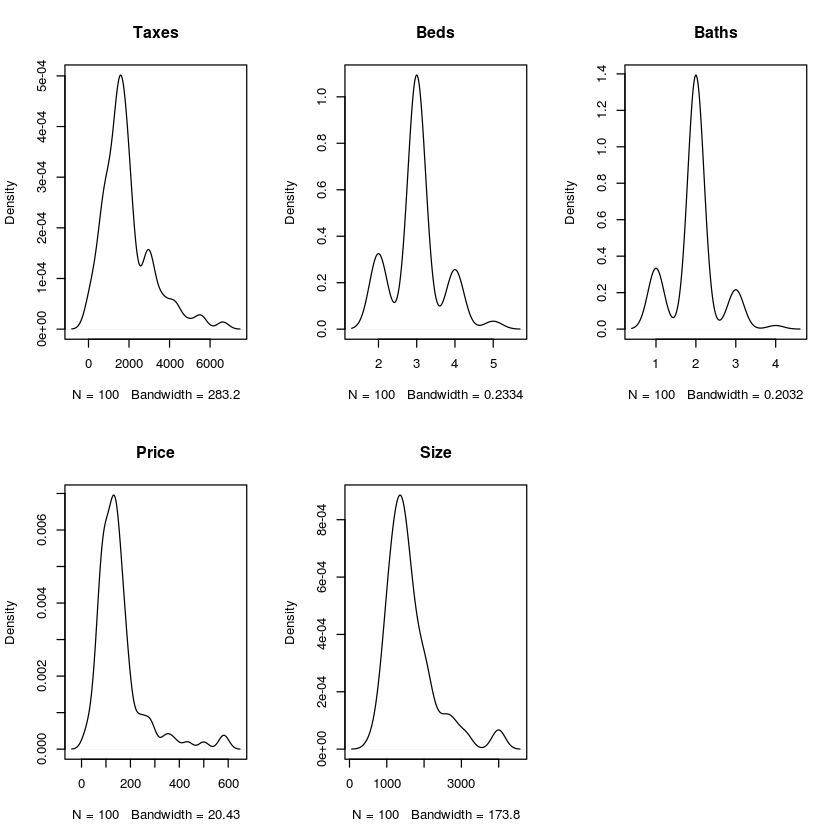

In [4]:
#Plotagem das densidades dos dados
par(mfrow=c(2,3))
plot(density(casas$taxes),main="Taxes")
plot(density(casas$beds),main="Beds")
plot(density(casas$baths),main="Baths")
plot(density(casas$price),main="Price")
plot(density(casas$size),main="Size")

Pelo gráfico de densidades os dados não aparentem seguir uma normal. Apesar da curva ser em muitos casos parecidas, temos uma assimetria em muitas delas, fato que ocorre na variável target.

Provavelmente com mais dados poderíamos ter uma conclusão melhor da distribuição. De qualquer forma, inicialmente iremos aproximar a distribuição pela normal dado a proximidade.

Devemos lembrar que tal aproximação está sendo feita pois os modelos lineares generalizados precisam que a variável dependente siga uma distribuição da família exponencial e a variáveis independetes quando normais produzem melhores resultados.

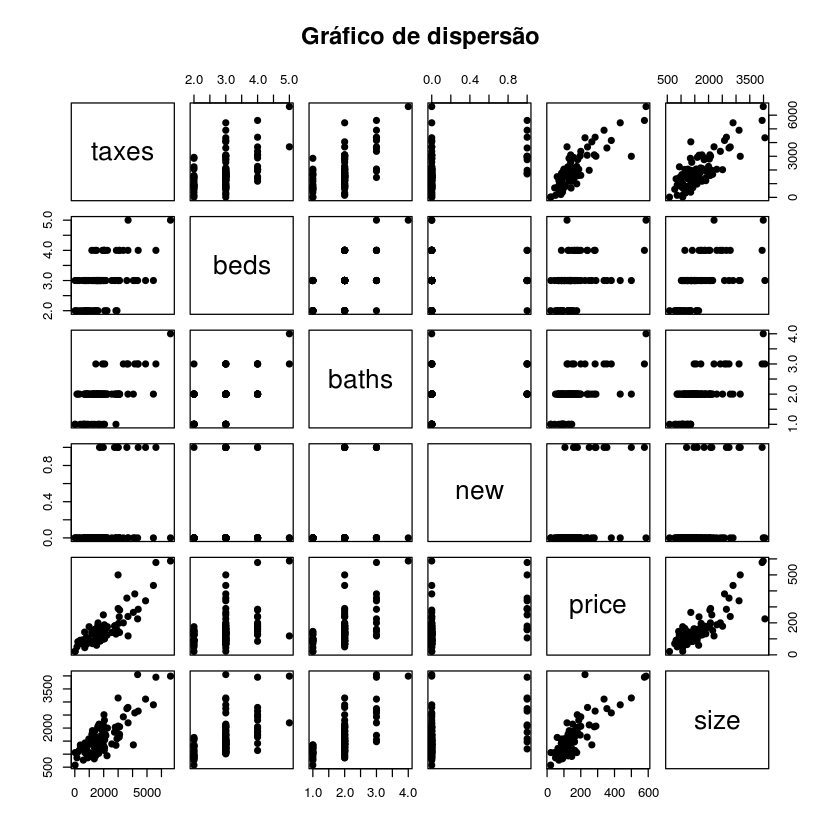

In [5]:
#Plotagem dos gráficos de dispersão
pairs(casas,main='Gráfico de dispersão',pch=19)

In [6]:
#Mostrando correlação entre os dados
cor(casas)

,taxes,beds,baths,new,price,size
taxes,1.0000000,0.47392873,0.5948543,0.38087410,0.8419802,0.8187958
beds,0.4739287,1.00000000,0.4922224,0.04931556,0.3939570,0.5447831
baths,0.5948543,0.49222235,1.0000000,0.25148095,0.5582533,0.6582247
new,0.3808741,0.04931556,0.2514810,1.00000000,0.4732608,0.3843277
price,0.8419802,0.39395702,0.5582533,0.47326080,1.0000000,0.8337848
size,0.8187958,0.54478311,0.6582247,0.38432773,0.8337848,1.0000000


Pelo gráfico de dispersão e pelas correlações calculadas note que as variáveis independentes possuem fortes relações entre elas. Logo, não devemos criar um modelo em que haja duas ou mais juntas pois tal colineariedade irá afetar em muito as nossas previões. Tal fato será demonstrado mais a frente.

## 2 - Ajuste de um modelo linear generalizado (mlg)

Ajustaremos um modelo normal com função de ligação identidade (poderia ser ajustado pela função lm).

In [7]:
#Ajustando o modelo
modelNormal1 = with(casas,glm(price ~ size + new, family = gaussian(link="identity")))

#Mostrando dados do modelo
summary(modelNormal1)


Call:
glm(formula = price ~ size + new, family = gaussian(link = "identity"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-205.102   -34.374    -5.778    18.929   163.866  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -40.230867  14.696140  -2.738  0.00737 ** 
size          0.116132   0.008795  13.204  < 2e-16 ***
new          57.736283  18.653041   3.095  0.00257 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 2903.157)

    Null deviance: 1015150  on 99  degrees of freedom
Residual deviance:  281606  on 97  degrees of freedom
AIC: 1086.1

Number of Fisher Scoring iterations: 2


É interessante notar pelos p-values que a hipótese nula (os coeficientes são iguais a zero) deve ser rejeitada. Logo, o intercepto,size e new são covariáveis importantes para o nosso modelo.

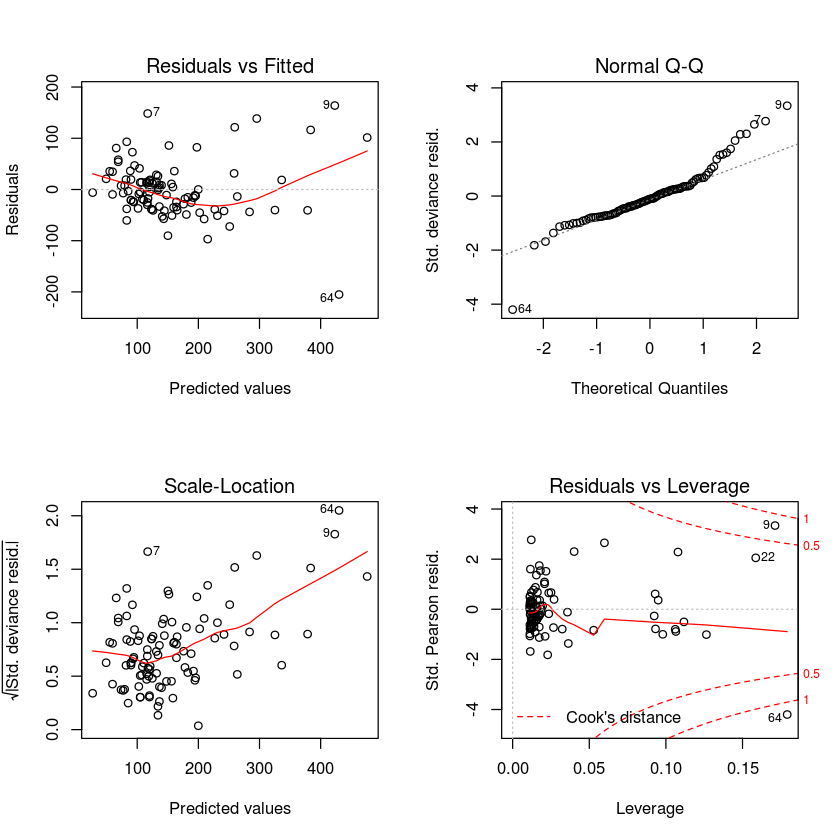

In [8]:
#Gráfico para analisar resíduos
par(mfrow = c(2,2))
plot(modelNormal1)

Analisando os gráficos residuals vs fitted e scale-location podemos ver que a nuvem de pontos aparente seguir uma certa tendência. Isso nos indica que nosso modelo não está bem ajustado, pois o ideal seria que tais pontos fossem aleatórios.

O gráfico normal qq nos demonstra se os resíduos estão seguindo uma normal. O mais interessante dele é notar o outlier 64.

O gráfico residuals vs leverage nos demonstra quais dados possuem uma influência muito forte no modelo. Nele podemos ver que os pontos 9,22 e 64 afetam bastante a nossa modelagem de modo que sua retirada irá afetar as previsões de algum modo.

## 3 - Modelo normal sem um outlier

Iremos remover o outlier (linha 64) encontrado na etapa anterior e realizar a modelagem de novo para verificar como sua ausência afeta o modelo.

In [9]:
#Removendo outilier
casas = casas[-64,]

In [10]:
#Ajustando novamente o modelo sem um outlier
modelNormal2 = with(casas,glm(price ~ size + new, family = gaussian(link="identity")))

#Mostrando dados do modelo
summary(modelNormal2)


Call:
glm(formula = price ~ size + new, family = gaussian(link = "identity"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-110.803   -32.567    -2.901    21.085   148.651  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -63.154488  14.251937  -4.431 2.49e-05 ***
size          0.132844   0.008776  15.138  < 2e-16 ***
new          41.306182  17.326908   2.384   0.0191 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 2399.567)

    Null deviance: 1010247  on 98  degrees of freedom
Residual deviance:  230358  on 96  degrees of freedom
AIC: 1056.4

Number of Fisher Scoring iterations: 2


Um fato interessante a se notar é com relação a covariável new. Veja que seu valor agora é aproximadamente 41 (antes era 57). Isso demonstra que o outlier estava "puxando" tal covariável para baixo.

Mais importante em saber que o outlier estava "puxando" o valor do modelo para baixo é realizar uma interpretação de parâmetros. Considerando que os valores estão em milhares de doláres, anteriomente teríamos que caso a casa seja nova ela teria um aumento no seu preço de 57 mil doláres. Sendo que após a retirada do outlier o aumento seria de 41 mil dólares.

Tal interpretação é muito importante, pois há uma diferença significativa entre 57 e 41. Isso demonstra mais uma vez a importância de se entender seus dados e realizar pré-processamento adequada nos mesmos. Gostaríamos de lembrar que quanto mais qualidade seus dados tiverem melhor será a previsão criada pelo seu modelo estatístico.

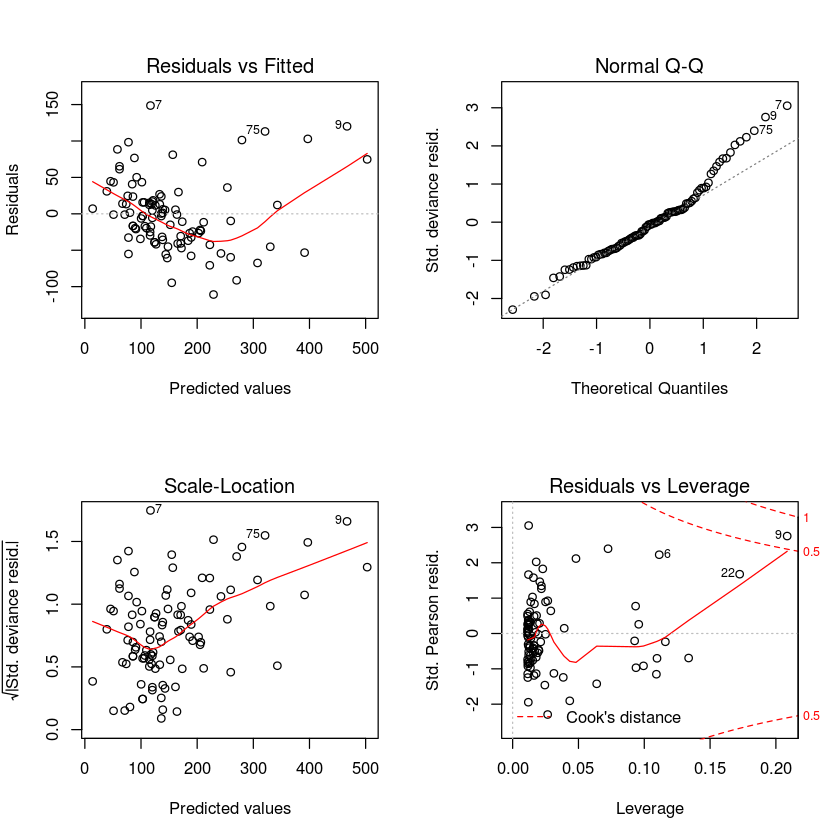

In [11]:
#Gráfico para analisar resíduos
par(mfrow = c(2,2))
plot(modelNormal2)

Com a retirada do outlier fica mais evidente nos gráficos residuals vs fitted e scale-location que nosso modelo não está bem ajustado. 

O normal qq conseguiu se ajustar melhor a reta após a retirada da amostra 64.

Com relação ao residuals vs leverage vemos os mesmo pontos como influentes.

Após essas análises fica mais evidente que nosso modelo não é adequado para descrever os dados.

## 4 - Modelo ajustado com nova variável

Iremos ajustar o modelo com uma nova covariável para verificar como a colineariedade afeta o modelo.

In [12]:
#Ajustando o modelo com uma nova variavel (beds)
modelNormal3 = with(casas,glm(price ~ size + new + beds, family = gaussian(link="identity")))

#Dados do modelo
summary(modelNormal3)


Call:
glm(formula = price ~ size + new + beds, family = gaussian(link = "identity"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-119.352   -30.615    -3.148    21.142   151.486  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20.03829   22.68044  -0.884   0.3792    
size          0.14935    0.01097  13.612   <2e-16 ***
new          29.70911   17.58312   1.690   0.0944 .  
beds        -22.77298    9.46222  -2.407   0.0180 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 2285.476)

    Null deviance: 1010247  on 98  degrees of freedom
Residual deviance:  217120  on 95  degrees of freedom
AIC: 1052.6

Number of Fisher Scoring iterations: 2


Note que com adição da covariável beds temos que o intercepto e new não são mais siginificantes (dado o seu p-value). Isso demonstra como a dependência entre elas afeta o modelo pois anteriomente havíamos considerado tais variáveis.

Uma interpretação intuitiva disso é que como existe relação entre elas, a alteração em uma irá afetar em cascata as outras que possuem relação. Logo, será muito difícil realizar uma previsão adequada.

## 5 - Ajustando modelo com a distribuição Gamma

Iremos ajustar outro modelo (mudaremos a distribuição da variável dependente). Tal ajuste será feito considerando a assimetria dos dados.

In [13]:
#Ajustando o modelo gamma
modelGamma = with(casas,glm(price ~ size, family = Gamma(link="identity")))

#Dados do modelo
summary(modelGamma)


Call:
glm(formula = price ~ size, family = Gamma(link = "identity"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.14166  -0.26427  -0.01814   0.14307   0.86753  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.990201  11.956708   -2.09   0.0392 *  
size          0.110237   0.009365   11.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.1124535)

    Null deviance: 31.782  on 98  degrees of freedom
Residual deviance: 10.968  on 97  degrees of freedom
AIC: 1037.3

Number of Fisher Scoring iterations: 6


Note que o modelo gamma consegue explicar a variável dependente apenas com a covariável size, tendo um eficácia similar ao nosso modelo normal. Isso é interessante pois há um processamento menor nos dados, logo, há um ganho de tempo.

Realmento a distribuição gamma parece mais adequada pois os dados que temos em mãos possuem uma assimetria grande. Conforme descrevemos no início deste notebook, inicialmente supomos a distribuição normal para os dados mas aparentemente eles tendem a seguir uma gama. 

Para que houvesse mais certeza disso deveríamos disponilizar de mais dados. Assim, seria possível retirar melhores conclusões.

## 6 - Análise de resíduos do modelo Gamma

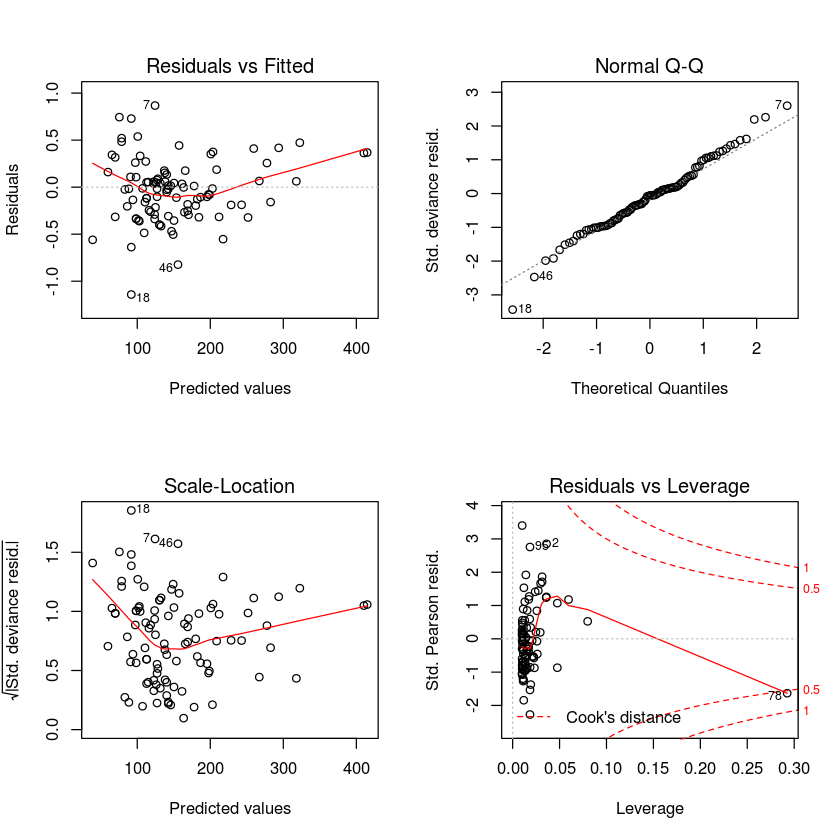

In [14]:
#Gráfico para analisar resíduos
par(mfrow = c(2,2))
plot(modelGamma)

Diferente do modelo normal podemos ver aqui que o gama aparente se ajustar melhor ao dados. Tal fato é comprovado pelos gráficos residuals vs fitted e scale-location. 

Os resíduos tambem seguem melhor uma normal conforme o normal qq demonstra.

Por fim o gráfico residuals vs leverage não demonstra muitos pontos influentes.

A partir disso temos evidências de que o modelo gama se ajusta melhor os dados comparado ao normal

## Conclusão

Ao longo deste notebook fica evidente como um pré-processamento dos dados é necessário para que possa-se criar melhores modelos. Conforme foi visto, a retidade de apenas um ponto(64) mudou os valores significamente dos modelos.

Além disso, é interessante notar como a análise de resíduos auxilia em determinar a qualidade de mlg criado. Podemos concluir, portanto, que todas essas verificações são necessárias para que ao final do processso gere-se um mlg que consiga descrever os dados ao realizar as previsões.